# Я художник, я так вижу, визуализация данных в питоне

# I. Numpy

### Импортируйте NumPy

In [1]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [26]:
arr=np.zeros(10)
arr[4]=1
print(arr.reshape(2,5))

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]


### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [27]:
arr=np.flip(np.arange(10,50))
print(arr[arr%2==0])

[48 46 44 42 40 38 36 34 32 30 28 26 24 22 20 18 16 14 12 10]


### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [17]:
arr=np.arange(0,9).reshape(3,3)
print(arr)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [28]:
arr=np.random.rand(4,3,2)
print(arr.max())
print(arr.min())

0.9230134194620373
0.0029817051613921786


### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [29]:
arr_1=np.random.rand(6,4)
arr_2=np.random.rand(4,3)
print(arr_1.dot(arr_2))

[[1.27397709 0.38536273 0.95584375]
 [1.18154133 0.42349078 0.79040574]
 [1.29350409 0.34689597 0.91765693]
 [1.99426223 1.0940136  0.75175705]
 [0.6465074  0.27068214 0.3534466 ]
 [0.85150152 0.45914822 0.34594692]]


### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [32]:
arr=np.random.rand(7,7)
print(arr.mean())
print(arr.std())
arr_norm=(arr-arr.min())/(arr.max()-arr.min())
print(arr_norm.round(2))

0.4600119146570547
0.30855197018611674
[[0.86 0.58 0.17 0.04 0.78 0.54 0.75]
 [0.16 1.   0.03 0.68 0.04 0.83 0.16]
 [0.15 0.39 0.12 0.45 0.64 0.17 0.43]
 [0.4  0.09 0.7  0.05 0.44 0.75 0.65]
 [0.28 0.93 0.83 0.38 0.29 0.84 0.72]
 [0.42 0.93 0.95 0.47 0.3  0.   0.08]
 [0.18 0.65 0.4  0.   0.88 0.08 0.91]]


# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [33]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams.update({
    'font.size': 14,             # Размер шрифта по умолчанию
    'figure.figsize': (10, 6),   # Размер фигуры (графика) в дюймах
    'axes.labelsize': 14,        # Размер подписей осей
    'xtick.labelsize': 12,       # Размер подписей на оси X
    'ytick.labelsize': 12,       # Размер подписей на оси Y
    'legend.fontsize': 12        # Размер шрифта в легенде
})

sns.set_theme(style='whitegrid')

warnings.simplefilter(action='ignore', category=FutureWarning)

### Загрузите датасет Tips из набора датасетов seaborn

In [15]:
tips = sns.load_dataset('tips')

### Посмотрите на первые 5 строчек

In [16]:
print(tips.head(5))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### Узнайте сколько всего строчек и колонок в данных

In [18]:
print(tips.shape)

(244, 7)


### Проверьте есть ли пропуски в данных

In [19]:
print(tips.isna().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


### Посмотрите на распределение числовых признаков

In [20]:
print(tips.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


### Найдите максимальное значение 'total_bill'

In [21]:
print(tips['total_bill'].max())

50.81


### Найдите количество курящих людей

In [22]:
print(tips.loc[tips['smoker']=='Yes', 'smoker'].count())

93


### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [23]:
print(tips.groupby(['day'])['total_bill'].mean())

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [24]:
print(tips
      .loc[tips['total_bill']>tips['total_bill'].median()]
      .groupby(['sex'])['tip']
      .mean()
      )

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64


### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [25]:
tips['smoker']=tips['smoker'].apply(lambda tips_: 1 if tips_=='Yes' else 0)
print(tips.head(5))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female      0  Sun  Dinner     2
1       10.34  1.66    Male      0  Sun  Dinner     3
2       21.01  3.50    Male      0  Sun  Dinner     3
3       23.68  3.31    Male      0  Sun  Dinner     2
4       24.59  3.61  Female      0  Sun  Dinner     4


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

Text(0, 0.5, 'total bill, $')

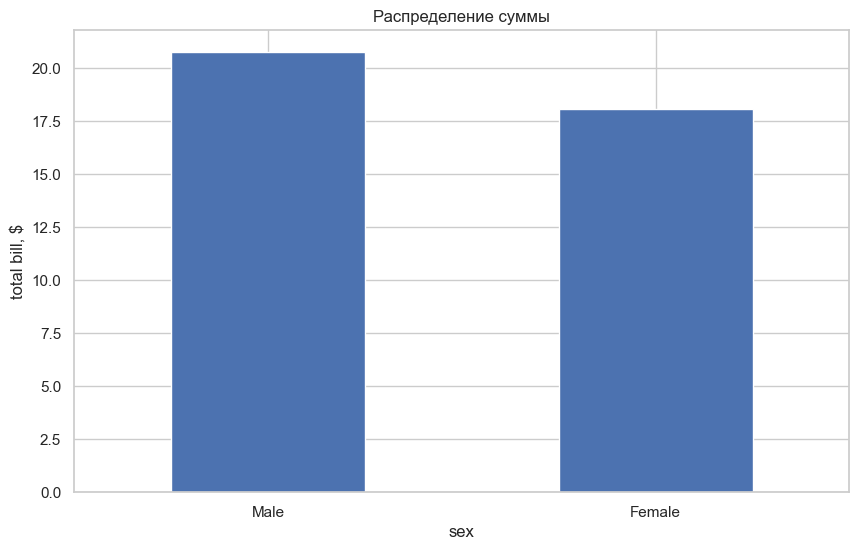

In [76]:
sex_bill=tips.groupby('sex')['total_bill'].mean()
sex_bill.plot(
    kind='bar',
    title='Распределение суммы',
    rot=0
)
plt.ylabel('total bill, $')

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

<Axes: title={'center': 'Зависимость суммы чаевых от счета'}, xlabel='total_bill', ylabel='tip'>

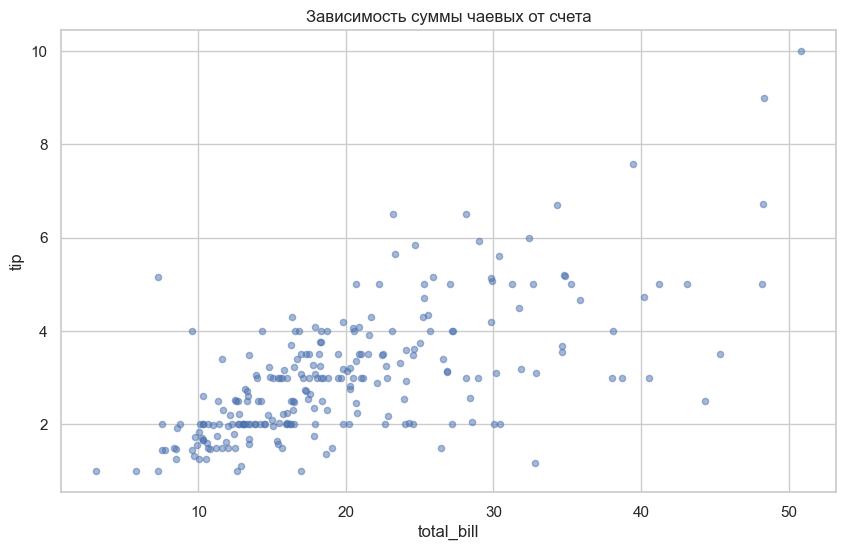

In [41]:
tips.plot(
    kind='scatter',
    x='total_bill',
    y='tip',
    alpha=0.5,
    title='Зависимость суммы чаевых от счета'
)


### Постройте pairplot

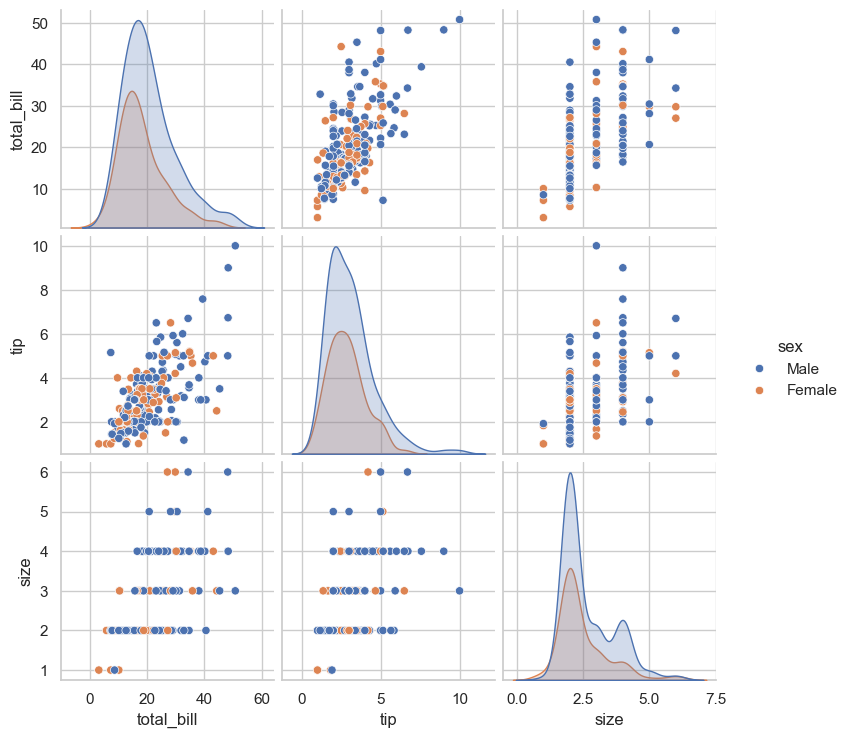

In [44]:
sns.pairplot(
    tips,
    hue='sex'
)

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

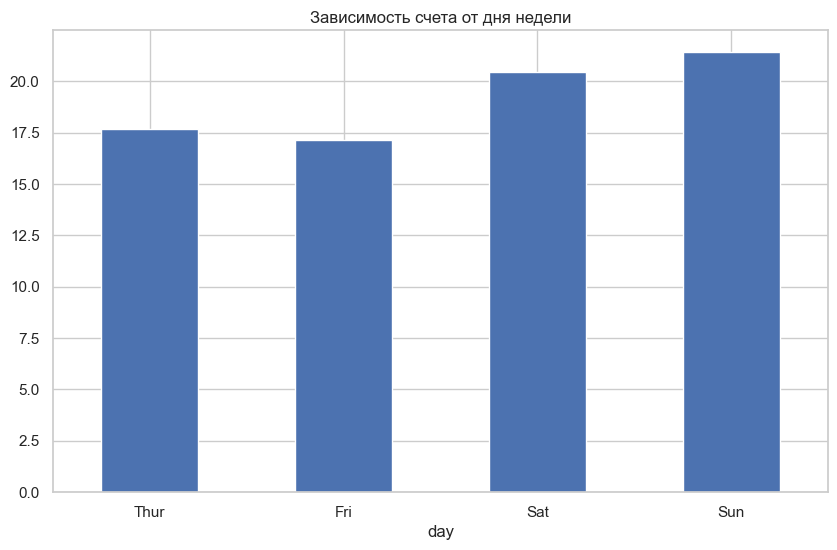

In [64]:
tips_bill = tips.groupby(['day'])['total_bill'].mean()


tips_bill.plot(kind='bar', title='Зависимость счета от дня недели', rot=0);

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

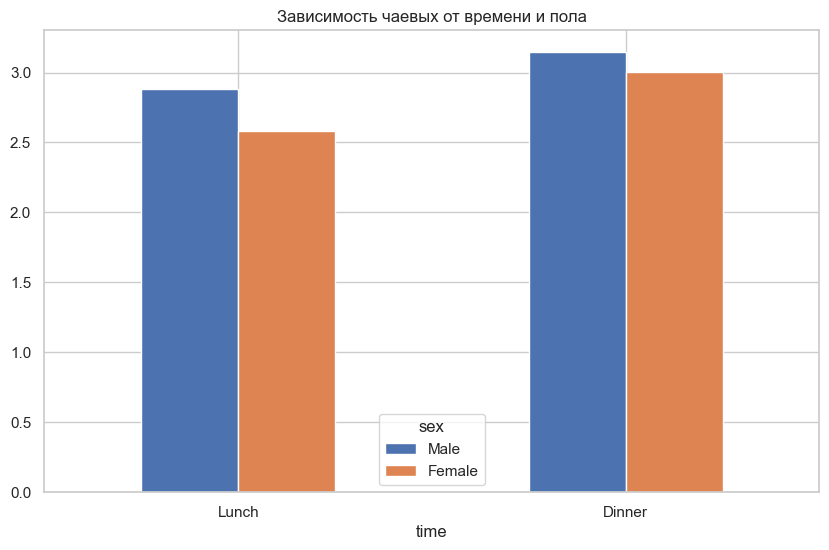

In [65]:
tips_tip = tips.groupby(['time','sex'])['tip'].mean().unstack()

tips_tip.plot(kind='bar', title='Зависимость чаевых от времени и пола', rot=0);

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

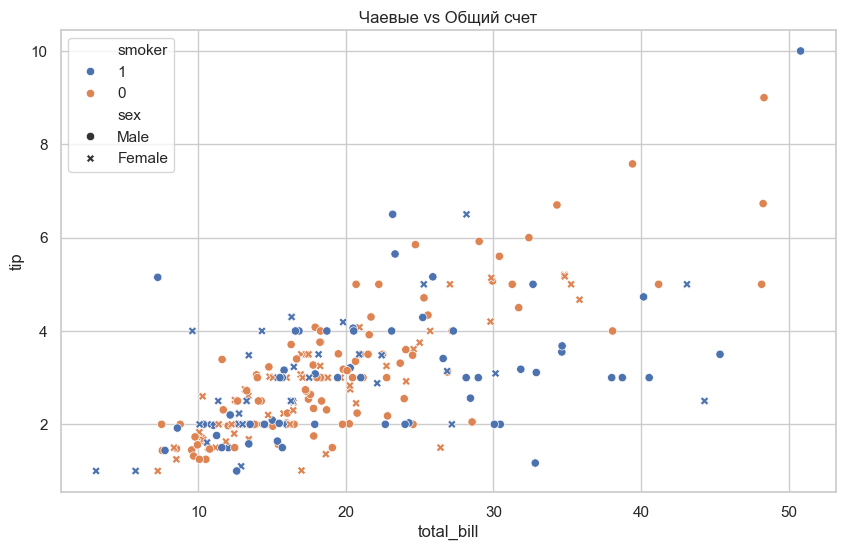

In [71]:
sns.scatterplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='smoker',
    style='sex'
)
plt.title('Чаевые vs Общий счет');

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

Text(0, 0.5, 'чаевые, $')

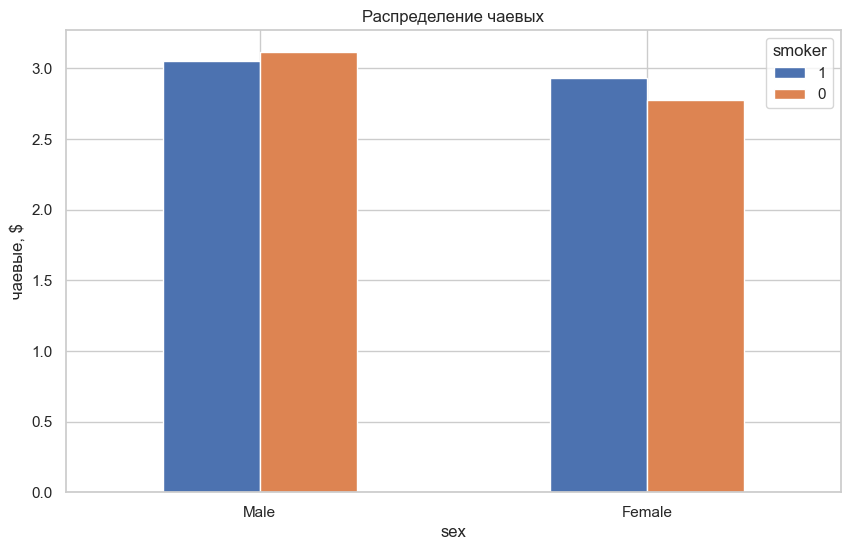

In [84]:
# при увеличении общего счета растет и сумма чаевых;
# за обедом чаевых оставляют больше как мужчины, так и женщины;
# в воскресение средний счет наибольший;
# мужчины в среднем тратят больше как на общий счет, так и на чаевые. Причем курящие женщины склонны оставлять больше чаевых.

sex_tip=tips.groupby(['sex','smoker'])['tip'].mean().unstack()
sex_tip.plot(
    kind='bar',
    title='Распределение чаевых',
    rot=0
)
plt.ylabel('чаевые, $')